
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Logistic Regresion Lab
## Exercise with bank marketing data

_Authors: Sam Stack(DC)_

## Introduction
- Data from the UCI Machine Learning Repository: data, [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal**: Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bank = pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


**  Target '`y`' represented as such**
    - No : 0
    - Yes : 1
    


In [88]:
# Perform what ever steps you need to familiarize yourself with the data:

In [63]:
bank.shape

(4119, 21)

In [90]:
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [64]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [65]:
bank.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4119,NaN,NaN,NaN,40.1136,10.3134,18,32,38,47,88
job,4119,12,admin.,1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4119,4,married,2509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4119,8,university.degree,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,4119,3,no,3315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,4119,3,yes,2175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,4119,3,no,3349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,4119,2,cellular,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,4119,10,may,1378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,4119,5,thu,860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
bank.y.value_counts()

0    3668
1     451
Name: y, dtype: int64

In [67]:
bank.loc[:,'y']

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int64

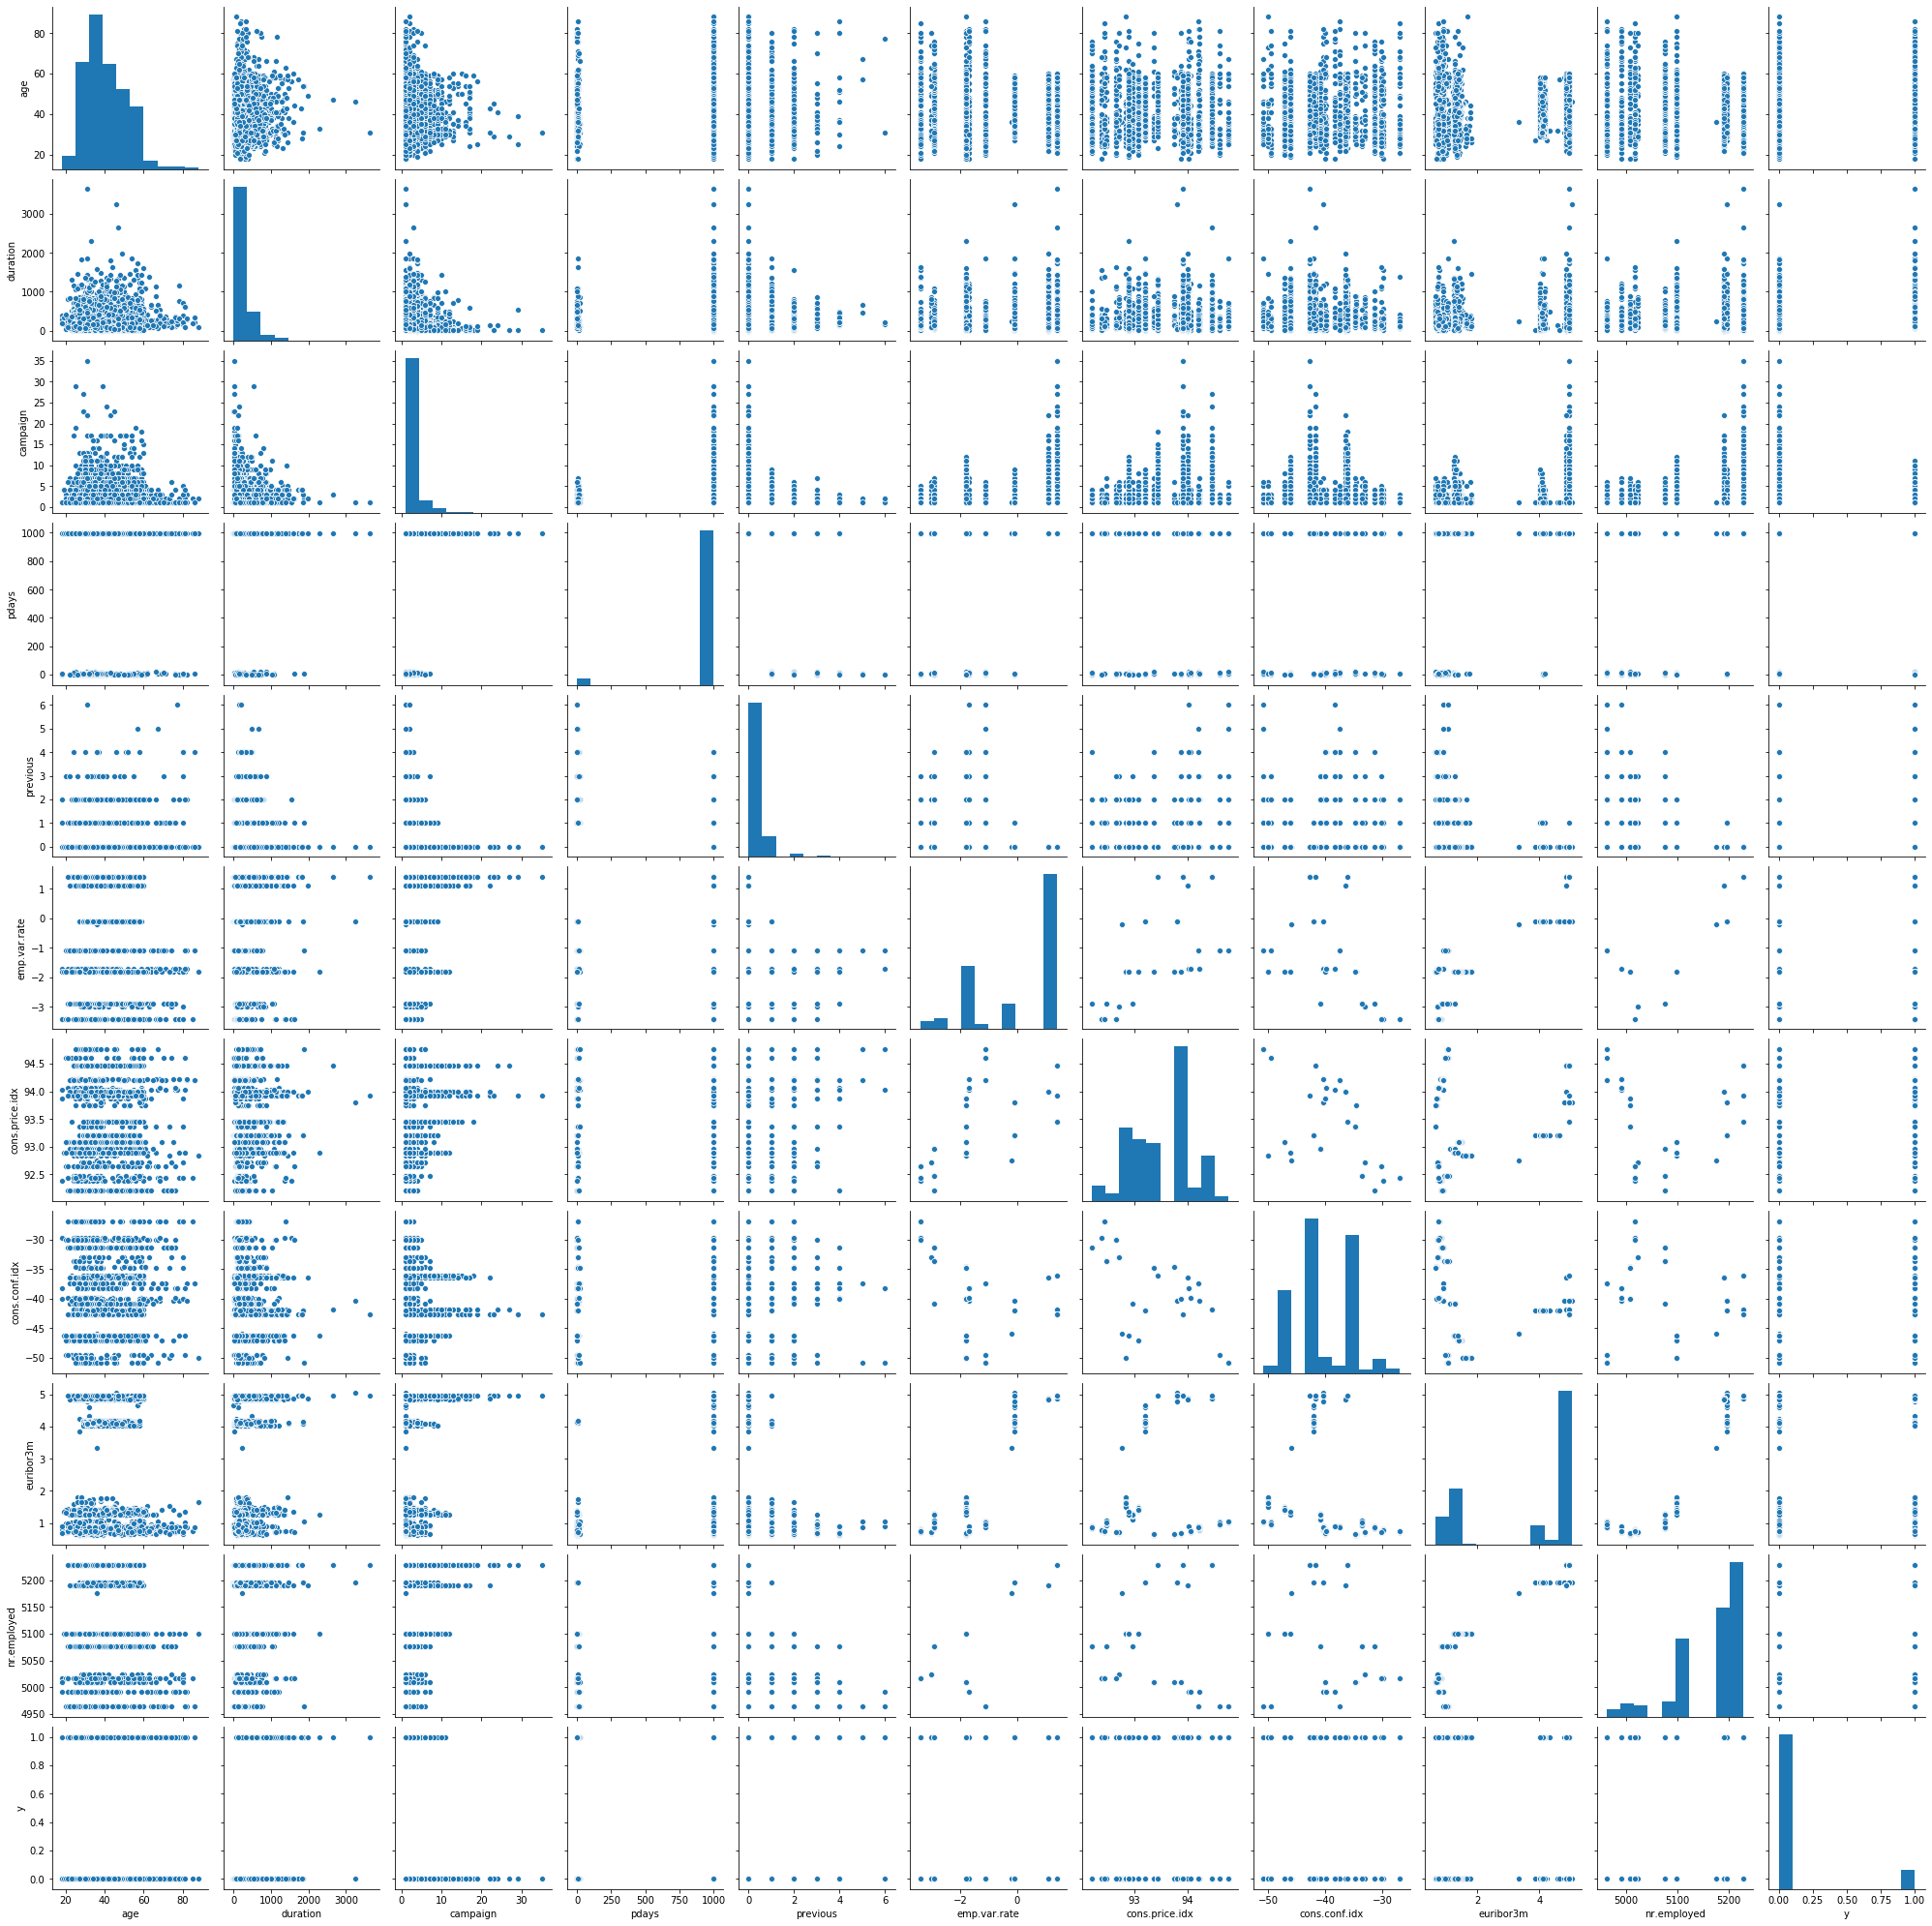

In [69]:
sns.pairplot(bank)

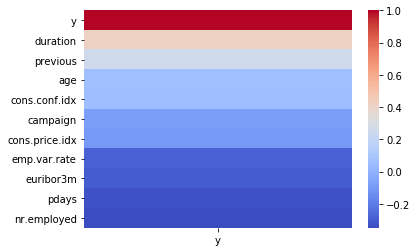

In [71]:
sns.heatmap(pd.DataFrame(bank.corr().loc[:,'y']).sort_values(by='y', ascending=False), cmap='coolwarm');


## Step 2: Prepare at least three features
- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [109]:
bank[bank.housing == 'unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
41,38,blue-collar,married,basic.9y,unknown,unknown,unknown,telephone,jun,fri,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0
87,47,services,single,basic.9y,no,unknown,unknown,telephone,jun,thu,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,1
173,41,services,single,high.school,unknown,unknown,unknown,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,0
375,31,technician,single,professional.course,no,unknown,unknown,cellular,aug,mon,...,7,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,33,blue-collar,married,basic.9y,no,unknown,unknown,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
4030,37,technician,divorced,professional.course,no,unknown,unknown,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
4042,40,blue-collar,single,basic.9y,no,unknown,unknown,cellular,nov,wed,...,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
4058,47,blue-collar,married,basic.4y,no,unknown,unknown,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0


In [110]:
bank.housing.value_counts()

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64

In [124]:
indexnames = bank[bank.housing == 'unknown'].index

In [125]:
indexnames

Int64Index([   3,   41,   87,  173,  375,  386,  422,  465,  468,  474,
            ...
            3802, 3839, 3916, 3934, 3998, 4023, 4030, 4042, 4058, 4110],
           dtype='int64', length=105)

In [126]:
bank.drop(indexnames, inplace=True)

In [127]:
bank.shape

(4014, 21)

In [128]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0


In [129]:
housing_dummy = pd.get_dummies(bank.housing, drop_first=True, prefix='housing')

In [130]:
housing_dummy

,housing_yes
0,1
1,0
2,1
4,1
5,0
...,...
4114,1
4115,1
4116,0
4117,0


In [131]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0


In [132]:
print(bank.shape)
print(housing_dummy.shape)

(4014, 21)
(4014, 1)


In [136]:
bank = bank.merge(housing_dummy, left_index=True, right_index=True)

In [137]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,housing_yes
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0,1
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0,1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0,1
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0,1
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0,1
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0,0


In [138]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'housing_yes'],
      dtype='object')

In [139]:
# A:
fcols = ['duration','previous','age','housing_yes']
X = bank[fcols]
y = bank.y


## Step 3: Model building
- Use cross-validation to evaluate the logistic regression model with your chosen features.  
    You can use any (combination) of the following metrics to evaluate.
    - [Classification/Accuracy Error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
    - [Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    - [ROC curves and area under a curve (AUC)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
    - [Log loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)
- Try to increase the metrics by selecting different sets of features
    - *Bonus*: Experiment with hyper parameters such are regularization.

In [140]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

**Build a Model**  

In [151]:
# convert selected features do dummies
fcols = ['duration','previous','age','housing_yes']
X = bank[fcols]
y = bank.y

# set the model
logit = LogisticRegression()

# set x and y
X = bank[fcols]
y = bank.y

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit model
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Get the Coefficient for each feature.**
- Be sure to make note of interesting findings.



In [152]:
logit.coef_

array([[0.00401097, 1.11181361, 0.00678226, 0.02080292]])

**Use the Model to predict on x_test and evaluate the model using metric(s) of Choice.**

In [153]:
# A:
y_pred = logit.predict(X_test)

In [154]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [155]:
metrics.accuracy_score(y_test, y_pred)

0.9043824701195219

In [158]:
cm = metrics.confusion_matrix(y_test, y_pred)

In [161]:
pd.crosstab(y_test, y_pred, margins=True,
           rownames=['true'], colnames=['pred'])

pred,0,1,All
true,,,
0,886,13,899
1,83,22,105
All,969,35,1004


### Model 2: Use a different combination of features.
- Evaluate the model and interpret your choosen metrics.

In [ ]:
# A;


In [208]:
# convert selected features do dummies
fcols = ['duration','pdays','age','housing_yes']
X = bank[fcols]
y = bank.y

# set the model
logit = LogisticRegression()

# set x and y
X = bank[fcols]
y = bank.y

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit model
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

In [209]:
metrics.accuracy_score(y_test, y_pred)

0.9043824701195219

In [210]:
metrics.confusion_matrix(y_test, y_pred, normalize='true')

array([[0.97775306, 0.02224694],
       [0.72380952, 0.27619048]])

In [211]:
pd.crosstab(y_test, y_pred, margins=True,
           rownames=['true'], colnames=['pred'], normalize=True)

pred,0,1,All
true,,,
0,0.875498,0.019920,0.895418
1,0.075697,0.028884,0.104582
All,0.951195,0.048805,1.000000




### Is your model not performing very well?

Is it not predicting any True Positives?

Lets try one more thing before we revert to grabbing more features.  Adjusting the probability threshold.

Use the `LogisticRegression.predict_proba()` attribute to get the probabilities.

Recall from the lesson the first probability is the for `class 0` and the second is for `class 1`.

In [212]:
# A:

In [213]:
proba = logit.predict_proba(X_test)[:,1]

**Visualize the distribution**

In [214]:
# A:
pp = pd.DataFrame(proba)

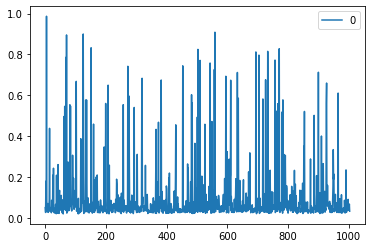

In [215]:
pp.plot()

** Calculate a new threshold and use it to convert predicted probabilities to output classes**



In [228]:
# A:
y_true = y_test
y_pred = proba > .2

In [229]:
len(y_test)

1004

In [230]:
len(y_pred.astype(int))

1004

In [231]:
metrics.accuracy_score(y_test, y_pred)

0.8944223107569721

**Evaluate the model metrics now**

In [ ]:
# A:

## Step 4: Build a model using all of the features.

- Evaluate it using your prefered metrics.

In [ ]:
# A:

## Bonus: Use Regularization to optimize your model.

In [ ]:
# try using a for loop to test various regularization strengths 'C'